The goal of this package is to make analyzing vacuoles way better, because it is currently a click nightmare. 

Goal #1 -
   
    Find a segmentation algorithm to separate out all vacuoles from the background. 

Goal #2 -

    Label the image (there is a function called label that will give a unique number to each object detected.

Goal #3 -

    Calculate regional properties of each object based on their intensity.

Goal #4 -

    Separate out uniform membranes from non-uniform membranes based on some regional property of the detected objects. 
    
    Note from chad:(I think a good start would be standard deviation of intensity, or some other measure of distribution of intensities. I can show you some that are pre-packaged into the regionprops function in skimage, but you can also make some customs)

Goal #1: Tasks: Need to import image from stack, Enahance contrast, Perform segmentation 

In [1]:
#Get a bunch of functions

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from skimage import io
from pylab import ginput
from collections import defaultdict
from skimage import data, img_as_float
from skimage import exposure
from skimage import filters
from scipy import ndimage as ndi
from skimage import feature
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh

(1200, 1920)

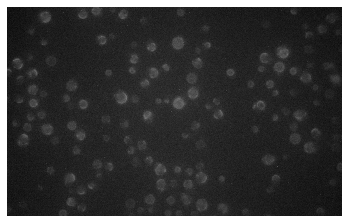

In [4]:
#Import image, adjust so all pixel values are scaled between 0 and 1

im1 = io.imread("IM1.ome.tif")
im = img_as_float(im1)

plt.imshow(im, cmap='gray')
plt.axis('off')
im.shape

In [5]:
print('Max inensity of the image: {}'.format(np.max(im)))
print('Min inensity of the image: {}'.format(np.min(im)))

Max inensity of the image: 0.602059967956054
Min inensity of the image: 0.11035324635690852


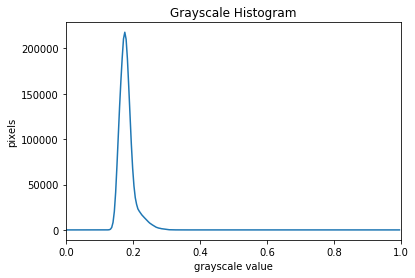

In [6]:
# Create histogram
histogram, bin_edges = np.histogram(im, bins=256, range=(0, 1))

# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0]) 

plt.plot(bin_edges[0:-1], histogram)  
plt.show()

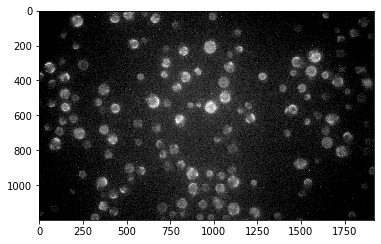

In [7]:
# Enhance contrast - stretching method 
# My understanding is that this is still a linear change in contrast

p_LOW, p_HIGH = np.percentile(im, (18,99.99))
im_rescale = exposure.rescale_intensity(im, in_range=(p_LOW, p_HIGH))

plt.imshow(im_rescale, cmap='gray')

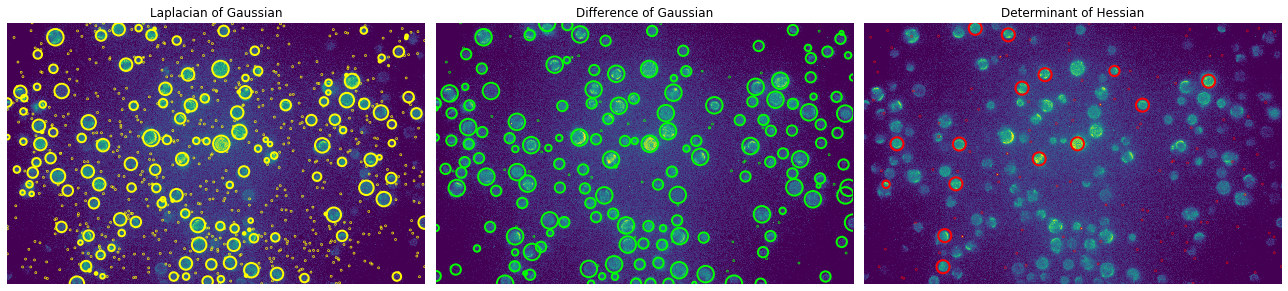

In [9]:

blobs_log = blob_log(im_rescale, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(im_rescale, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(im_rescale, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(im_rescale)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

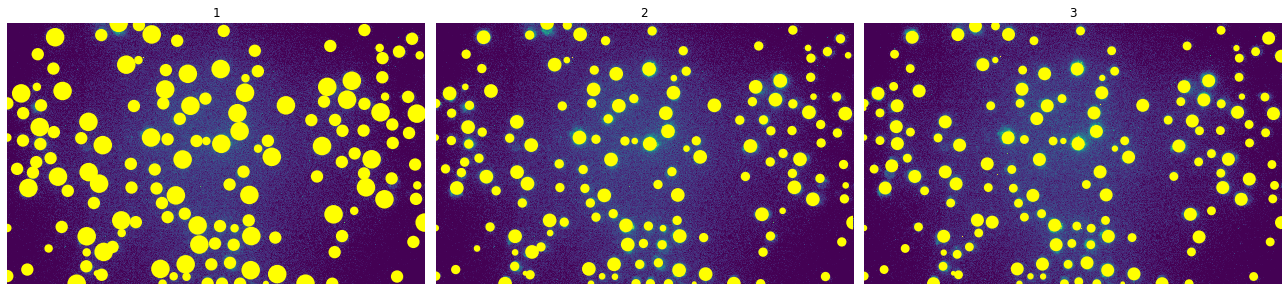

In [11]:
blobs_dog = blob_dog(im_rescale, min_sigma=1, max_sigma=30, threshold=.2)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_dog1 = blob_dog(im_rescale, min_sigma=1, max_sigma=30, threshold=.2)

blobs_dog2 = blob_dog(im_rescale, min_sigma=1.5, max_sigma=30, threshold=.2)

blobs_list = [blobs_dog, blobs_dog1, blobs_dog2]
colors = ['yellow', 'yellow', 'yellow']
titles = ['1', '2', '3']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(im_rescale)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=True)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

array([1199.        , 1494.        ,   23.72656641])